In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
grouped_data = df.groupby("Species")
species_to_display = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for Species in species_to_display:
    print(f"Species: {Species}")
    species_data = grouped_data.get_group(Species)
    statistics = species_data.describe()
    print(statistics)
    print('\n')

Species: Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000


Species: Iris-versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911 

In [7]:
#alternative
print('Iris-setosa')
setsosa=df['Species']== 'Iris-setosa'
print(df[setsosa].describe())

Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000


<Axes: xlabel='SepalLengthCm', ylabel='Count'>

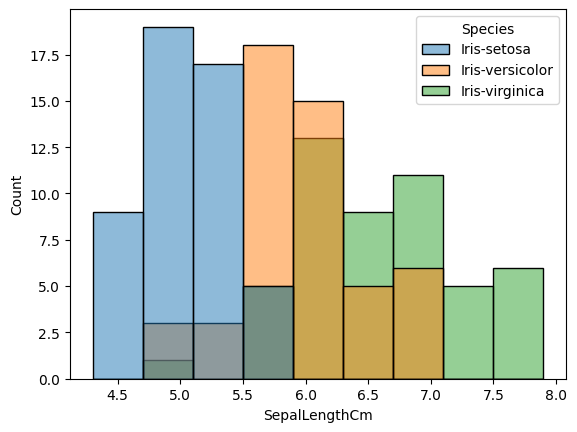

In [10]:
sns.histplot(data=df, hue='Species',x='SepalLengthCm') #same for all 4 params

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

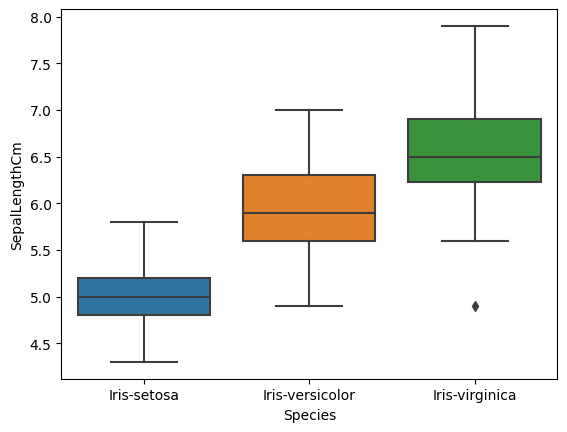

In [11]:
sns.boxplot(data=df, x='Species',y='SepalLengthCm') #same for all 4

In [13]:
bins=[0.1,1,2,3]
labels=['0.1-0.9','1.0-2.0','2.1-3.0']
df['PetalWidthGroup']=pd.cut(df['PetalWidthCm'], bins=bins, labels=labels, right=False)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalGroup,PetalWidthGroup
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.1-0.9,0.1-0.9
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.1-0.9,0.1-0.9
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.1-0.9,0.1-0.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.1-0.9,0.1-0.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.1-0.9,0.1-0.9
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2.1-3.0,2.1-3.0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1.0-2.0,1.0-2.0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2.1-3.0,2.1-3.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.1-3.0,2.1-3.0


In [14]:
df.groupby('PetalWidthGroup')['Species'].describe()

,count,unique,top,freq
PetalWidthGroup,,,,
0.1-0.9,50,1,Iris-setosa,50
1.0-2.0,71,2,Iris-versicolor,50
2.1-3.0,29,1,Iris-virginica,29


In [15]:
petalData=list(df.groupby('PetalWidthGroup')['Species'])
petalData

[('0.1-0.9',
  0     Iris-setosa
  1     Iris-setosa
  2     Iris-setosa
  3     Iris-setosa
  4     Iris-setosa
  5     Iris-setosa
  6     Iris-setosa
  7     Iris-setosa
  8     Iris-setosa
  9     Iris-setosa
  10    Iris-setosa
  11    Iris-setosa
  12    Iris-setosa
  13    Iris-setosa
  14    Iris-setosa
  15    Iris-setosa
  16    Iris-setosa
  17    Iris-setosa
  18    Iris-setosa
  19    Iris-setosa
  20    Iris-setosa
  21    Iris-setosa
  22    Iris-setosa
  23    Iris-setosa
  24    Iris-setosa
  25    Iris-setosa
  26    Iris-setosa
  27    Iris-setosa
  28    Iris-setosa
  29    Iris-setosa
  30    Iris-setosa
  31    Iris-setosa
  32    Iris-setosa
  33    Iris-setosa
  34    Iris-setosa
  35    Iris-setosa
  36    Iris-setosa
  37    Iris-setosa
  38    Iris-setosa
  39    Iris-setosa
  40    Iris-setosa
  41    Iris-setosa
  42    Iris-setosa
  43    Iris-setosa
  44    Iris-setosa
  45    Iris-setosa
  46    Iris-setosa
  47    Iris-setosa
  48    Iris-setosa
  49   

In [19]:
pivot_table = df.pivot_table(values='SepalLengthCm', index='SepalWidthCm', columns=df['PetalWidthGroup'], aggfunc=['mean', 'median', 'min', 'max', 'std'])
pivot_table

mean                      median                     min  \
PetalWidthGroup   0.1-0.9   1.0-2.0   2.1-3.0 0.1-0.9 1.0-2.0 2.1-3.0 0.1-0.9   
SepalWidthCm                                                                    
2.0                   NaN  5.000000       NaN     NaN    5.00     NaN     NaN   
2.2                   NaN  6.066667       NaN     NaN    6.00     NaN     NaN   
2.3              4.500000  5.600000       NaN    4.50    5.50     NaN     4.5   
2.4                   NaN  5.300000       NaN     NaN    5.50     NaN     NaN   
2.5                   NaN  5.771429  5.700000     NaN    5.60    5.70     NaN   
2.6                   NaN  5.775000  7.700000     NaN    5.75    7.70     NaN   
2.7                   NaN  5.855556       NaN     NaN    5.80     NaN     NaN   
2.8                   NaN  6.311111  6.380000     NaN    6.20    6.40     NaN   
2.9              4.400000  6.244444       NaN    4.40    6.20     NaN     4.4   
3.0              4.700000  6.100000  6.985714    4.80    6.00    6.80     4.3   
3.1              4.820000  6.675000  6.833333    4.90    6.70    6.90     4.6   
3.2              4.680000  6.625000  6.650000    4.70    6.70    6.65     4.4   
3.3              5.050000  6.300000  6.566667    5.05    6.30    6.70     5.0   
3.4              5.033333  6.000000  6.250000    5.00    6.00    6.25     4.6   
3.5              5.150000       NaN       NaN    5.10     NaN     NaN     5.0   
3.6              4.800000       NaN  7.200000    4.80     NaN    7.20     4.6   
3.7              5.266667       NaN       NaN    5.30     NaN     NaN     5.1   
3.8              5.250000       NaN  7.800000    5.10     NaN    7.80     5.1   
3.9              5.400000       NaN       NaN    5.40     NaN     NaN     5.4   
4.0              5.800000       NaN       NaN    5.80     NaN     NaN     5.8   
4.1              5.200000       NaN       NaN    5.20     NaN     NaN     5.2   
4.2              5.500000       NaN       NaN    5.50     NaN     NaN     5.5   
4.4              5.700000       NaN       NaN    5.70     NaN     NaN     5.7   

                                    max                       std            \
PetalWidthGroup 1.0-2.0 2.1-3.0 0.1-0.9 1.0-2.0 2.1-3.0   0.1-0.9   1.0-2.0   
SepalWidthCm                                                                  
2.0                 5.0     NaN     NaN     5.0     NaN       NaN       NaN   
2.2                 6.0     NaN     NaN     6.2     NaN       NaN  0.115470   
2.3                 5.0     NaN     4.5     6.3     NaN       NaN  0.655744   
2.4                 4.9     NaN     NaN     5.5     NaN       NaN  0.346410   
2.5                 4.9     5.7     NaN     6.7     5.7       NaN  0.675066   
2.6                 5.5     7.7     NaN     6.1     7.7       NaN  0.250000   
2.7                 5.2     NaN     NaN     6.4     NaN       NaN  0.357460   
2.8                 5.7     5.6     NaN     7.4     7.7       NaN  0.537225   
2.9                 5.6     NaN     4.4     7.3     NaN       NaN  0.507718   
3.0                 5.4     6.5     5.0     7.2     7.7  0.282843  0.518009   
3.1                 6.4     6.7     4.9     6.9     6.9  0.130384  0.206155   
3.2                 5.9     6.4     5.0     7.2     6.9  0.216795  0.590903   
3.3                 6.3     6.3     5.1     6.3     6.7  0.070711       NaN   
3.4                 6.0     6.2     5.4     6.0     6.3  0.273861       NaN   
3.5                 NaN     NaN     5.5     NaN     NaN  0.187083       NaN   
3.6                 NaN     7.2     5.0     NaN     7.2  0.282843       NaN   
3.7                 NaN     NaN     5.4     NaN     NaN  0.152753       NaN   
3.8                 NaN     7.7     5.7     NaN     7.9  0.300000       NaN   
3.9                 NaN     NaN     5.4     NaN     NaN  0.000000       NaN   
4.0                 NaN     NaN     5.8     NaN     NaN       NaN       NaN   
4.1                 NaN     NaN     5.2     NaN     NaN       NaN       NaN   
4.2               

In [20]:
crosstab = pd.crosstab(index=df['SepalLengthCm'], values=df['SepalWidthCm'], columns=df['PetalWidthGroup'], aggfunc=['mean', 'median', 'min', 'max', 'std'])
crosstab

mean                      median                     min  \
PetalWidthGroup   0.1-0.9   1.0-2.0   2.1-3.0 0.1-0.9 1.0-2.0 2.1-3.0 0.1-0.9   
SepalLengthCm                                                                   
4.3              3.000000       NaN       NaN    3.00     NaN     NaN     3.0   
4.4              3.033333       NaN       NaN    3.00     NaN     NaN     2.9   
4.5              2.300000       NaN       NaN    2.30     NaN     NaN     2.3   
4.6              3.325000       NaN       NaN    3.30     NaN     NaN     3.1   
4.7              3.200000       NaN       NaN    3.20     NaN     NaN     3.2   
4.8              3.180000       NaN       NaN    3.10     NaN     NaN     3.0   
4.9              3.075000  2.450000       NaN    3.10    2.45     NaN     3.0   
5.0              3.362500  2.150000       NaN    3.40    2.15     NaN     3.0   
5.1              3.600000  2.500000       NaN    3.60    2.50     NaN     3.3   
5.2              3.666667  2.700000       NaN    3.50    2.70     NaN     3.4   
5.3              3.700000       NaN       NaN    3.70     NaN     NaN     3.7   
5.4              3.660000  3.000000       NaN    3.70    3.00     NaN     3.4   
5.5              3.850000  2.440000       NaN    3.85    2.40     NaN     3.5   
5.6                   NaN  2.820000  2.800000     NaN    2.90    2.80     NaN   
5.7              4.100000  2.820000  2.500000    4.10    2.80    2.50     3.8   
5.8              4.000000  2.680000  2.800000    4.00    2.70    2.80     4.0   
5.9                   NaN  3.066667       NaN     NaN    3.00     NaN     NaN   
6.0                   NaN  2.733333       NaN     NaN    2.80     NaN     NaN   
6.1                   NaN  2.850000       NaN     NaN    2.85     NaN     NaN   
6.2                   NaN  2.633333  3.400000     NaN    2.80    3.40     NaN   
6.3                   NaN  2.714286  3.350000     NaN    2.70    3.35     NaN   
6.4                   NaN  2.975000  2.933333     NaN    3.00    2.80     NaN   
6.5                   NaN  2.900000  3.066667     NaN    2.90    3.00     NaN   
6.6                   NaN  2.950000       NaN     NaN    2.95     NaN     NaN   
6.7                   NaN  2.925000  3.175000     NaN    3.05    3.20     NaN   
6.8                   NaN  2.800000  3.100000     NaN    2.80    3.10     NaN   
6.9                   NaN  3.100000  3.133333     NaN    3.10    3.10     NaN   
7.0                   NaN  3.200000       NaN     NaN    3.20     NaN     NaN   
7.1                   NaN       NaN  3.000000     NaN     NaN    3.00     NaN   
7.2                   NaN  3.100000  3.600000     NaN    3.10    3.60     NaN   
7.3                   NaN  2.900000       NaN     NaN    2.90     NaN     NaN   
7.4                   NaN  2.800000       NaN     NaN    2.80     NaN     NaN   
7.6                   NaN       NaN  3.000000     NaN     NaN    3.00     NaN   
7.7                   NaN       NaN  3.050000     NaN     NaN    2.90     NaN   
7.9                   NaN       NaN  3.800000     NaN     NaN    3.80     NaN   

                                    max                       std            \
PetalWidthGroup 1.0-2.0 2.1-3.0 0.1-0.9 1.0-2.0 2.1-3.0   0.1-0.9   1.0-2.0   
SepalLengthCm                                                                 
4.3                 NaN     NaN     3.0     NaN     NaN       NaN       NaN   
4.4                 NaN     NaN     3.2     NaN     NaN  0.152753       NaN   
4.5                 NaN     NaN     2.3     NaN     NaN       NaN       NaN   
4.6                 NaN     NaN     3.6     NaN     NaN  0.221736       NaN   
4.7                 NaN     NaN     3.2     NaN     NaN  0.000000       NaN   
4.8                 NaN     NaN     3.4     NaN     NaN  0.204939       NaN   
4.9                 2.4     NaN     3.1     2.5     NaN  0.050000  0.070711   
5.0                 2.0     NaN     3.6     2.3     NaN  0.192261  0.212132   
5.1                 2.5     NaN     3.8     2.5     NaN  0.200000       N